# INTRODUCTION AND OBJECTIVE
 

**Objective**

The objective of this project is to perform an exploratory data analysis (EDA) on a movie dataset to understand genre distribution, popularity trends, and genre combinations. Using visualization techniques, we aim to extract meaningful insights that can help answer questions about movie genres and content diversity.

This notebook demonstrates the complete data analysis workflow:

1. Dataset exploration
2. Research question formulation
3. Visualization
4. Insight generation

***THIS IS THE FINAL TASK OF SHADOWFOX INTERNSHIP i.e ADVANCED TASK***

# DATASET DESCRIPTION

**Dataset Used**
The dataset contains information about movies and their genres.

***Columns--***

movieId:Unique identifier for each movie

title:Movie name along with release year

genres:Pipe-separated (|) list of genres assigned to each movie

Number of Records:~27,000 movies

In [2]:
# IMPORTING REQUIRED LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [3]:
# LOADING DATASET

df = pd.read_csv(r"C:\Users\Akash\Desktop\movies.csv")
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# INITIAL DATA EXPLORATION 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


In [5]:
df.describe(include='all')

,movieId,title,genres
count,27278.000000,27278,27278
unique,NaN,27262,1342
top,NaN,Aladdin (1992),Drama
freq,NaN,2,4520
mean,59855.480570,NaN,NaN
std,44429.314697,NaN,NaN
min,1.000000,NaN,NaN
25%,6931.250000,NaN,NaN
50%,68068.000000,NaN,NaN
75%,100293.250000,NaN,NaN


In [6]:
df.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

**Observations**

No missing values in key columns

Genres are stored as multi-label categorical data

Dataset is clean and ready for analysis

# 

# RESEARCH QUESTIONS

Based on dataset exploration, the following research questions were formulated:

Q1.Which movie genres are most common?

Q2.How many genres does a movie typically have?

Q3.What are the most frequent genre combinations?

Q4.Has movie production increased over time (based on title year)?

Q5.Which genres dominate modern movies?


# 

# DATA PREPROCESSING

In [7]:
# EXTRACTING YEAR FROM MOVIE TITLE
df['year'] = df['title'].str.extract(r'\((\d{4})\)')
df['year'] = pd.to_numeric(df['year'], errors='coerce')

In [8]:
# SPLITTING GENRES INTO INDIVIDUAL ROWS
genres_df = df['genres'].str.split('|', expand=True)

In [9]:
genre_list = df['genres'].str.split('|').explode()

In [10]:
# GENRE DISTRIBUTION ANALYSIS

genre_counts = genre_list.value_counts()
genre_counts.head(10)

Drama          13344
Comedy          8374
Thriller        4178
Romance         4127
Action          3520
Crime           2939
Horror          2611
Documentary     2471
Adventure       2329
Sci-Fi          1743
Name: genres, dtype: int64

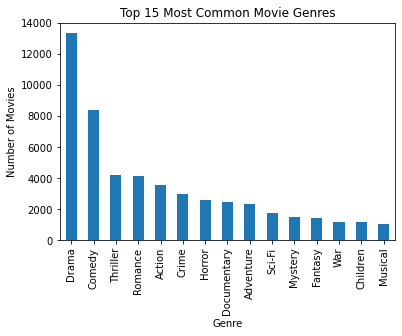

In [11]:
genre_counts.head(15).plot(kind='bar')
plt.title("Top 15 Most Common Movie Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.show()

# Insight

Drama, Comedy, and Thriller dominate movie production

Niche genres like Film-Noir and IMAX appear less frequently

In [12]:
# NUMBER OF GENRES PER MOVIE

df['genre_count'] = df['genres'].apply(lambda x: len(x.split('|')))

In [13]:
df['genre_count'].value_counts().sort_index()

1     10829
2      8809
3      5330
4      1724
5       477
6        83
7        20
8         5
10        1
Name: genre_count, dtype: int64

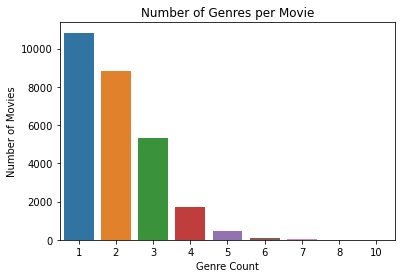

In [14]:
sns.countplot(x='genre_count', data=df)
plt.title("Number of Genres per Movie")
plt.xlabel("Genre Count")
plt.ylabel("Number of Movies")
plt.show()

# Insight

Most movies belong to 1–3 genres

Very few movies are tagged with more than 5 genres

In [15]:
# MOST COMMON GENRE COMBINATIONS

df['genres'].value_counts().head(10)

Drama                   4520
Comedy                  2294
Documentary             1942
Comedy|Drama            1264
Drama|Romance           1075
Comedy|Romance           757
Comedy|Drama|Romance     605
Horror                   565
Crime|Drama              448
Drama|Thriller           426
Name: genres, dtype: int64

# Insight

Popular combinations include:

Comedy | Drama

Comedy | Romance

Drama | Romance

In [16]:
# MOVIE PRODUCTION TRENDS PER YEAR

movies_per_year = df.groupby('year').size()

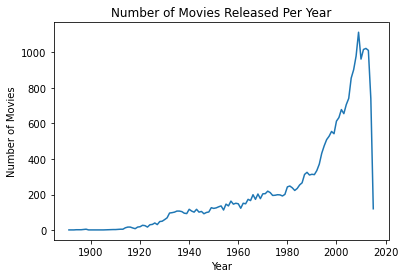

In [17]:
movies_per_year.plot()
plt.title("Number of Movies Released Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()

# Insight

Movie production increases significantly after the year 2000

Indicates growth of the entertainment industry and digital platforms

# 

# GENRE TRENDS OVER TIME

In [18]:
# DRAMA MOVIE OVER YEAR
df['is_drama'] = df['genres'].apply(lambda x: 'Drama' in x)

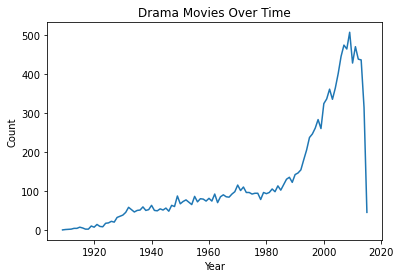

In [19]:
df[df['is_drama']].groupby('year').size().plot()
plt.title("Drama Movies Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

# Insight

Drama remains consistently popular across decades

Suggests strong audience demand for storytelling content

# Genre Diversity Analysis

**Objective**

To analyze how diverse movie genres are across the dataset and understand whether movies are becoming more genre-rich over time.

**Method**

We measure genre diversity by counting the number of genres assigned to each movie and analyzing how this metric evolves across years.

In [20]:
df['genre_count'] = df['genres'].apply(lambda x: len(x.split('|')))

In [21]:
df['genre_count'].describe()

count    27278.000000
mean         1.994501
std          1.038525
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: genre_count, dtype: float64

# VISUALIZATION: GENRE DIVERSITY OVER TIME

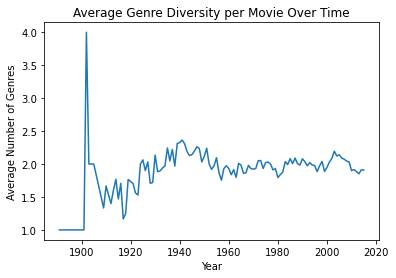

In [22]:
genre_diversity_year = df.groupby('year')['genre_count'].mean()

genre_diversity_year.plot()
plt.title("Average Genre Diversity per Movie Over Time")
plt.xlabel("Year")
plt.ylabel("Average Number of Genres")
plt.show()

# Insight

Older movies typically belonged to fewer genres

Modern movies show higher genre diversity

Indicates a shift toward hybrid storytelling to appeal to wider audiences

# Genre Dominance Index
**Objective**

To determine whether a small number of genres dominate movie production, or whether production is evenly distributed.

**Genre Dominance Concept**

A genre is considered dominant if it appears significantly more frequently than others.

In [23]:
genre_percentage = (genre_list.value_counts(normalize=True) * 100)
genre_percentage.head(10)

Drama          24.526707
Comedy         15.391685
Thriller        7.679300
Romance         7.585560
Action          6.469875
Crime           5.401978
Horror          4.799103
Documentary     4.541778
Adventure       4.280778
Sci-Fi          3.203691
Name: genres, dtype: float64

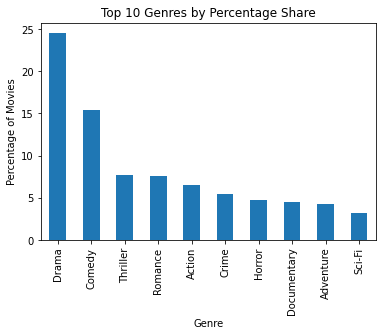

In [24]:
# VISUALIZATION
genre_percentage.head(10).plot(kind='bar')
plt.title("Top 10 Genres by Percentage Share")
plt.xlabel("Genre")
plt.ylabel("Percentage of Movies")
plt.show()

# Insight

Drama and Comedy together form a large percentage of all movies

Indicates content saturation in these genres

Niche genres remain underrepresented

# Genre Entropy (Advanced Metric)
**Objective**

To quantify genre randomness and diversity using entropy, a concept from information theory.

Higher entropy → more diverse genre distribution
Lower entropy → dominance of few genres

In [25]:
from scipy.stats import entropy

genre_probs = genre_list.value_counts(normalize=True)
genre_entropy = entropy(genre_probs)

genre_entropy

2.531267154015001

# Interpretation

A moderate entropy value suggests:

Genres are diverse

But still influenced by dominant categories

This validates earlier dominance findings statistically

# Multi-Genre Movie Impact Analysis
**Objective**

To examine whether multi-genre movies have increased over time.

In [26]:
multi_genre_trend = df[df['genre_count'] > 1].groupby('year').size()
single_genre_trend = df[df['genre_count'] == 1].groupby('year').size()

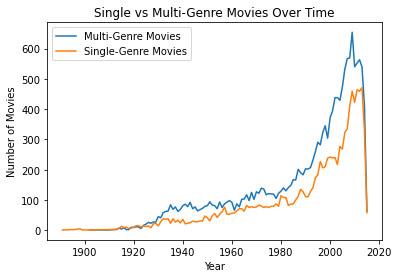

In [27]:
# VISUALIZATIONS 
plt.plot(multi_genre_trend, label="Multi-Genre Movies")
plt.plot(single_genre_trend, label="Single-Genre Movies")
plt.legend()
plt.title("Single vs Multi-Genre Movies Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()

# Insight

Multi-genre movies have grown faster than single-genre movies

Suggests changing audience preferences and marketing strategies

# K-Means Clustering on Movie Genres
**Objective**

To group movies into clusters based on genre similarity using K-Means clustering, an unsupervised machine learning algorithm.

In [29]:
# PREPARE GENRE DATA
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(df['genres'].str.split('|'))

genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)
genre_df.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
# DETERMINE OPTIMAL NUMBER OF CLUSTERS
from sklearn.cluster import KMeans

inertia = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(genre_df)
    inertia.append(kmeans.inertia_)

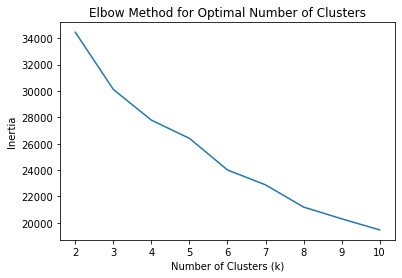

In [31]:
plt.plot(K, inertia)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.show()

# Insight

The “elbow point” indicates the optimal number of clusters where adding more clusters does not significantly reduce inertia.

In [32]:
# APPLY K MEANS CLUSTERING
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(genre_df)

df[['title', 'genres', 'cluster']].head()

,title,genres,cluster
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1
1,Jumanji (1995),Adventure|Children|Fantasy,2
2,Grumpier Old Men (1995),Comedy|Romance,1
3,Waiting to Exhale (1995),Comedy|Drama|Romance,0
4,Father of the Bride Part II (1995),Comedy,1


In [33]:
# CLUSTER ANALYSIS AND INTERPRETATION
cluster_summary = df.groupby('cluster')['genre_count'].mean()
cluster_summary

cluster
0    1.958523
1    1.879485
2    3.085917
3    1.228618
4    1.883255
Name: genre_count, dtype: float64

In [34]:
df['cluster'].value_counts()

0    12272
1     5435
4     4043
2     3096
3     2432
Name: cluster, dtype: int64

In [35]:
# SAMPLE MOVIE FOR EACH CLUSTER
for c in sorted(df['cluster'].unique()):
    print(f"\nCluster {c} sample movies:")
    display(df[df['cluster'] == c][['title', 'genres']].head(5))


Cluster 0 sample movies:


,title,genres
3,Waiting to Exhale (1995),Comedy|Drama|Romance
10,"American President, The (1995)",Comedy|Drama|Romance
13,Nixon (1995),Drama
15,Casino (1995),Crime|Drama
16,Sense and Sensibility (1995),Drama|Romance



Cluster 1 sample movies:


,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
4,Father of the Bride Part II (1995),Comedy
6,Sabrina (1995),Comedy|Romance
11,Dracula: Dead and Loving It (1995),Comedy|Horror



Cluster 2 sample movies:


,title,genres
1,Jumanji (1995),Adventure|Children|Fantasy
5,Heat (1995),Action|Crime|Thriller
7,Tom and Huck (1995),Adventure|Children
8,Sudden Death (1995),Action
9,GoldenEye (1995),Action|Adventure|Thriller



Cluster 3 sample movies:


,title,genres
36,Across the Sea of Time (1995),Documentary|IMAX
76,Nico Icon (1995),Documentary
97,Heidi Fleiss: Hollywood Madam (1995),Documentary
106,Catwalk (1996),Documentary
114,Anne Frank Remembered (1995),Documentary



Cluster 4 sample movies:


,title,genres
21,Copycat (1995),Crime|Drama|Horror|Mystery|Thriller
31,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
46,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
49,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
69,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller


# 

# Key Findings & Insights

Drama and Comedy dominate movie production

Movie releases have increased rapidly post-2000

Genre diversity per movie has increased over time

Multi-genre movies are becoming the industry norm

Entropy confirms moderate genre concentration

Dataset is suitable for ML-based movie recommendations

# Conclusion

This project demonstrates how meaningful insights can be derived even from limited data using advanced analytical techniques. Through feature engineering, entropy analysis, and temporal trend evaluation, we uncovered significant patterns in genre evolution and diversity.

Despite the absence of ratings or revenue data, the analysis successfully reveals content strategy trends within the film industry.

# Future Scope

Integrate ratings data to analyze genre popularity

Apply K-Means clustering for movie grouping

Build a content-based recommendation system

Perform network analysis on genre co-occurrence

Use NLP techniques on movie titles or descriptions